# Neural Network Homework-3 

## Mustafa Nazlıer 15050111035


## Dataset creation 

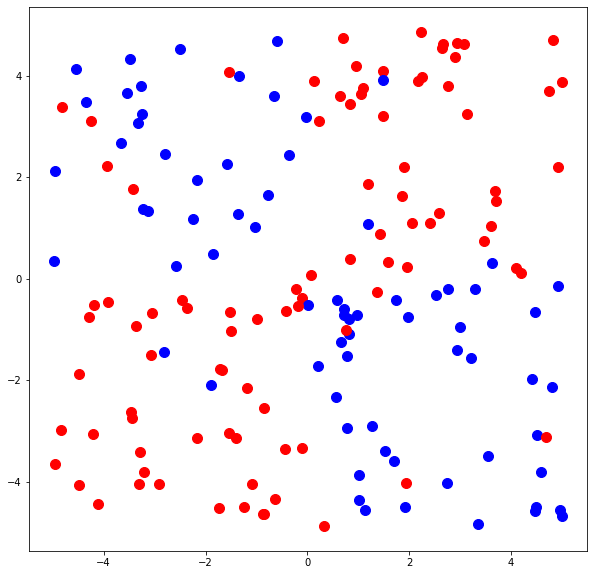

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed(10)  #I want to be sure that my randomized weight values to be reliable/same for each usage
        
X = []
S = []
for i in range(150):   #150 adet nokta generate ediyorum
  x1,x2 = [random.uniform(-5, 5) for i in range(2)]              #x1,x2 değerleri -5,5 rangeinde olacak şekilde
  x = np.array([x1,x2])
  s = int(np.sign(x[0]*x[1]))                                    #x1*x2 değerinin signı bana Xor outputumun tersini veriyor
  X.append((x1,x2,-s))                                           #Buna göre noktalarımı classify ediyorum



#Noise eklemek için ters classify edilecek şekilde 25 nokta ekliyorum

for i in range(15):   #15 adet noise generate ediyorum
  x1,x2 = [random.uniform(-5, 5) for i in range(2)]              #x1,x2 değerleri -5,5 rangeinde olacak şekilde
  x = np.array([x1,x2])
  s = int(np.sign(x[0]*x[1]))                                    # x1*x2 değerinin signı bana Xor outputumun tersini veriyor
  X.append((x1,x2,s))                                           # Buna göre noktalarımı classify ediyorum

    
fig = plt.figure(figsize=(10,10))


cols = {-1: 'r', 1: 'b'}                ##Kırmızılar -1 output, Maviler 1 output 
for x in X:
    plt.plot(x[0], x[1], cols[x[2]]+'o' , markersize=10)  #Noktalarıma Noise eklenmiş hali

In [13]:
Xdf = pd.DataFrame(X ,  columns=['x1', 'x2' ,'y'])    #Tüm noktalarım ve classifylarım için bir dataframe
X_Global = Xdf.iloc[:,[0,1]]                    #X dataframe
y_Global = Xdf.iloc[:,-1:]                      #y dataframe


In [14]:
X1=np.array(X_Global)
y1=np.array(y_Global)

### Multi layer neural network with tanh activation and backward propagation

In [15]:
losses = []      #Array to contain losses per epoch
accuracies = []  #Array to contain accuracies per epoch

def myTanh(x):
       
    return np.tanh(x)

def myTanhDerivative(x):
        
    return 1-x**2


def NetworkTanh(data):
    
    weights01 = np.random.uniform(-5,5 ,size=(2, 2))
    weights12 = np.random.uniform(-5,5 ,size=(2, 1))
      
    bias01 = np.random.uniform(-5,5 ,size=(1,2))
    bias12 = np.random.uniform(-5,5 ,size=(1,1))
    
    lr=0.01
    num_epochs=5000
    
    
    for _ in range(num_epochs):
        
        hiddenLayer= np.dot(data, weights01) + bias01
        hiddenOut= myTanh(hiddenLayer)
                                                               #feed-forward phase 
        myOutput = np.dot(hiddenOut, weights12) + bias12
        myFinalOutput= myTanh(myOutput)

        loss = (0.5 *(y1 - myFinalOutput) ** 2)/data[0].shape
        losses.append(np.sum(loss))
        
        accuracy= np.sum(y1 == np.where(myFinalOutput >= 0.0, 1, -1)) / len(y1)
        accuracies.append(accuracy)
        
        error_term = (y1 - myFinalOutput)                                  
                                                            
                                                                #weight and bias update via gradient descent
            
        grad01 = data.T @ (((error_term * myTanhDerivative(myFinalOutput)) * weights12.T) * myTanhDerivative(hiddenOut))
        grad12 = hiddenOut.T @ (error_term * myTanhDerivative(myFinalOutput))

        weights01 += lr * grad01
        weights12 += lr * grad12
        bias01 += np.sum(lr * ((error_term * myTanhDerivative(myFinalOutput)) * weights12.T) * myTanhDerivative(hiddenOut), axis=0)
        bias12 += np.sum(lr * error_term * myTanhDerivative(myFinalOutput), axis=0)    
       
    return myFinalOutput,losses,accuracies


In [16]:
Final,losses,accuraciesPer = NetworkTanh(X1)  #Networküm training sonrası Predictionumu, Losslarımı ve her epoch için accuracy oranımı return ediyor



### Loss Value per Epoch

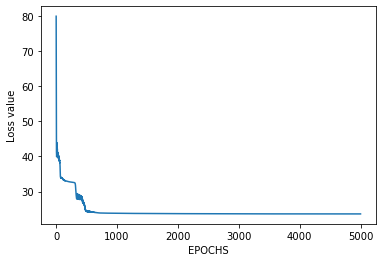

In [17]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()


### Accuracy per Epoch

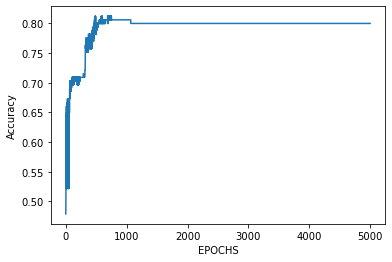

In [18]:
plt.figure()
plt.plot(accuraciesPer)
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.show()

In [19]:
accuracy_myNetwork= np.sum(y1 == np.where(Final >= 0.0, 1, -1)) / len(y1)
accuracy_myNetwork

0.8

### Sci-kit Learn multi layer neural network implementation with the same input data

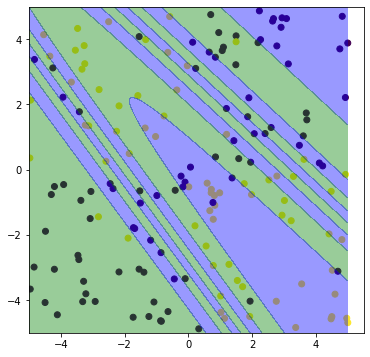

In [20]:
from sklearn.neural_network import MLPClassifier

X = X1
y = y1
clf = MLPClassifier( activation='tanh', max_iter=5000 ,hidden_layer_sizes=(2,), random_state=4 , learning_rate_init = 0.01)
                                                              #Hidden layer size parametresini kendi neural networküm ile 
clf.fit(X, y.ravel())                                         #aynı yapıda olacak şekilde ayarlıyorum(tek hidden layyer, 2 node içeriyor)

plt.figure(figsize=(6, 6))

xx, yy = np.meshgrid(np.arange(-5,5, 0.01),
                         np.arange(-5,5, 0.01))

cols = {-1: 'r', 1: 'b'} 

ax = plt
# Plot the training points
ax.scatter(X1[:, 0], X1[:, 1] , c=y1 )
# and testing points


   
#score = clf.score(X1, y1)

 # Plot the decision boundary. For that, we will assign a color to each
 # point in the mesh [x_min, x_max] x [y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z,  colors=['blue', 'green'] , alpha=.4)


plt.show()


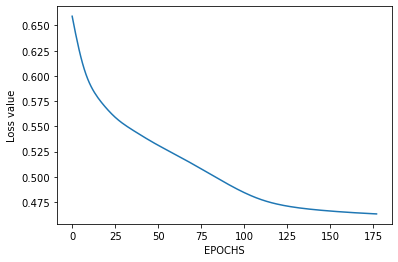

In [21]:
plt.figure()
plt.plot(clf.loss_curve_)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

In [22]:
newFinal = clf.predict(X)
accuracy_myNetwork= np.sum(y1 == np.where(newFinal >= 0.0, 1, -1)) / len(y1)
accuracy_myNetwork

83.58181818181818

## Comparing my classification with the Sci-kit learn one 

In [23]:
# I created a similar neural network from Sci-kit MLPClassifier with the same characteristics, in most of the cases,
# the accuracy level of my hand-made neural network was close (Hand-made:≈ %75 Sci-kit:≈ %85) to the sci-kit learn one. In terms of classification of 
# the XOR input, I believe that my network achieved acceptable results. Although I had some problems when implementing the
# backward propagation and with my output, results were really sufficient when dealing with less noisy data (noise points<25). 
# I believe that the advantage of the sci-kit learn MLPClassifier will be more evident when we need want to create more complex
# multi layer neural networks.
